In [ ]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [ ]:
import pandas as pd
df = pd.read_csv("/openpowerlifting-2021-12-10-b420db66.csv")
df

<ipython-input-4-3ed620caec70>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548448,伊藤 由実子,F,B,Single-ply,38.5,35-39,24-39,Open,50.80,52,...,Yes,NaN,NaN,JPA,IPF,2015-10-31,Japan,NaN,Minokamo,Japanese Bench Press Championships
548449,赤澤 恋,F,B,Single-ply,15.5,16-17,14-18,Sub-Juniors,52.00,52,...,Yes,NaN,NaN,JPA,IPF,2015-10-31,Japan,NaN,Minokamo,Japanese Bench Press Championships
548450,南 采沙,F,B,Single-ply,21.5,20-23,19-23,Juniors,51.05,52,...,Yes,NaN,NaN,JPA,IPF,2015-10-31,Japan,NaN,Minokamo,Japanese Bench Press Championships
548451,渡辺 礼美,F,B,Single-ply,49.0,45-49,40-49,Masters 1,48.20,52,...,Yes,NaN,NaN,JPA,IPF,2015-10-31,Japan,NaN,Minokamo,Japanese Bench Press Championships


In [ ]:
list(df.columns)

['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Dots',
 'Wilks',
 'Glossbrenner',
 'Goodlift',
 'Tested',
 'Country',
 'State',
 'Federation',
 'ParentFederation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [ ]:
df.tail(10)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
375172,Jessica Raze,F,SBD,Raw,27.5,24-34,24-39,FR-O,61.9,63,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375173,Rachel Leach,F,SBD,Raw,23.5,24-34,24-39,FR-O,57.4,63,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375174,Leah Austin,F,SBD,Raw,51.5,50-54,50-59,FR-O,62.2,63,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375175,Jeanne Murdock,F,SBD,Raw,65.0,65-69,60-69,FR-O,62.7,63,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375176,Esther Scott,F,SBD,Raw,33.5,24-34,24-39,FR-O,71.7,72,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375177,Nicci Pritchett,F,SBD,Raw,29.5,24-34,24-39,FR-O,67.4,72,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375178,Nora Sanzo,F,SBD,Raw,23.5,24-34,24-39,FR-O,70.9,72,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375179,Keanne Henry,F,SBD,Raw,40.5,40-44,40-49,FR-O,69.1,72,...,Yes,USA,MD,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375180,Tara Torlone,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.6,72,...,Yes,USA,VA,USAPL,IPF,2018-06-09,USA,VA,NaN,Battle at the Beach
375181,Lyndsey Smith,F,SBD,Raw,28.5,24-34,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Top 10 states for Men.

In [ ]:
import pandas as pd
from tabulate import tabulate
df_state_men = df.loc[df["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1 = df_state_men.sort_values(by="count",ascending=False)
print("Top 10 states for Men")
print(tabulate(df1.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 52 | VA      |    1621 |
| 29 | NC      |    1559 |
| 42 | PA      |    1276 |
| 21 | MD      |     585 |
| 37 | NY      |     470 |
|  3 | AZ      |     436 |
| 38 | OH      |     246 |
| 10 | FL      |     194 |
| 31 | NE      |     179 |
|  7 | CT      |     161 |
+----+---------+---------+


# 2. Top 10 states for Women.

In [ ]:
import pandas as pd
from tabulate import tabulate
df_state_women = df.loc[df["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df1 = df_state_women.sort_values(by="count",ascending=False)
print("Top 10 states for Women")
print(tabulate(df1.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Women
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 40 | VA      |     717 |
| 22 | NC      |     611 |
| 33 | PA      |     397 |
|  3 | AZ      |     180 |
| 29 | NY      |     169 |
| 16 | MD      |     165 |
| 14 | KY      |      90 |
|  8 | DC      |      88 |
| 15 | MA      |      76 |
|  7 | CT      |      74 |
+----+---------+---------+


#3. Plot pie chart and bar chart for Men Top 21-30 states (inclusive).

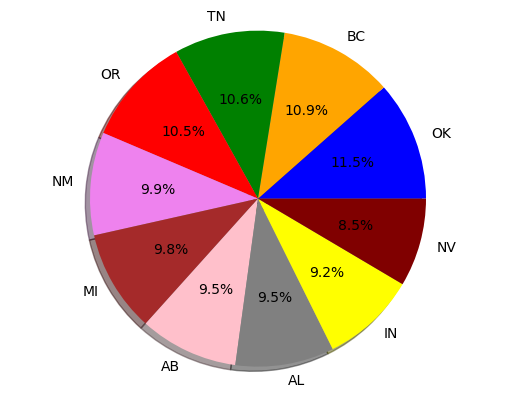

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0)

plt.axis("equal")
plt.show()


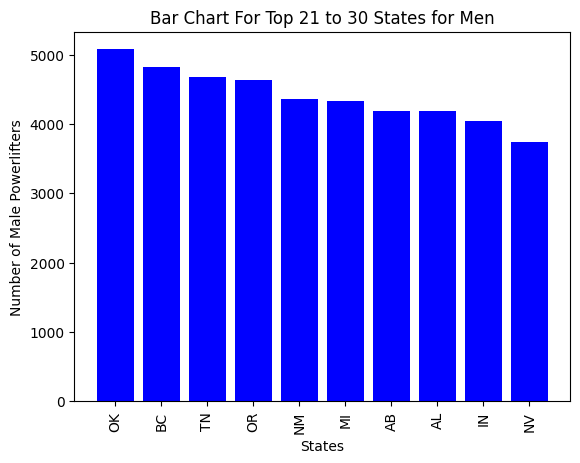

In [ ]:
plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=90)
plt.show()

#4. Plot pie chart and bar chart for Women Top 21-30 states (inclusive).

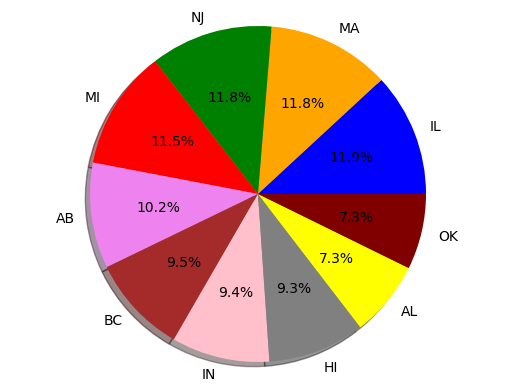

In [ ]:
import matplotlib.pyplot as plt

data = {"IL": 2184, "MA": 2174, "NJ": 2169, "MI": 2115, "AB": 1870,
        "BC": 1744, "IN": 1733, "HI": 1717, "AL": 1343, "OK": 1337}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

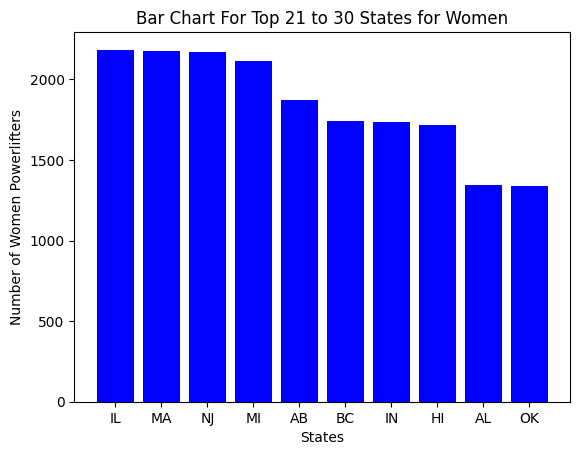

In [ ]:
plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Women Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Women")
plt.xticks(rotation=0)
plt.show()


#5. Top 10 states for Men in year 2021

In [ ]:
def get_year(row):
  return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year

In [ ]:
df_2021 = df[df['Date'].str.contains('2021')]
df_state_men_2021 = df_2021.loc[df_2021["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1_2021 = df_state_men_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Men in 2021")
print(tabulate(df1_2021.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 59 | TX      |    1499 |
| 12 | FL      |     923 |
|  6 | CA      |     659 |
| 43 | NY      |     610 |
| 64 | WI      |     544 |
| 22 | LA      |     503 |
| 44 | OH      |     484 |
| 27 | MI      |     483 |
| 33 | NC      |     478 |
| 37 | NJ      |     478 |
+----+---------+---------+


#6. Top 10 states for Women in year 2021

In [ ]:
def get_year(row):
  return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year

In [ ]:
df_state_women_2021 = df_2021.loc[df_2021["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2_2021 = df_state_women_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Women in 2021")
print(tabulate(df2_2021.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 59 | TX      |     807 |
| 12 | FL      |     430 |
| 64 | WI      |     404 |
| 43 | NY      |     345 |
| 27 | MI      |     340 |
| 33 | NC      |     321 |
| 22 | LA      |     309 |
|  6 | CA      |     238 |
| 44 | OH      |     207 |
| 28 | MN      |     195 |
+----+---------+---------+


#7. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60

<ipython-input-19-49992311da27>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)


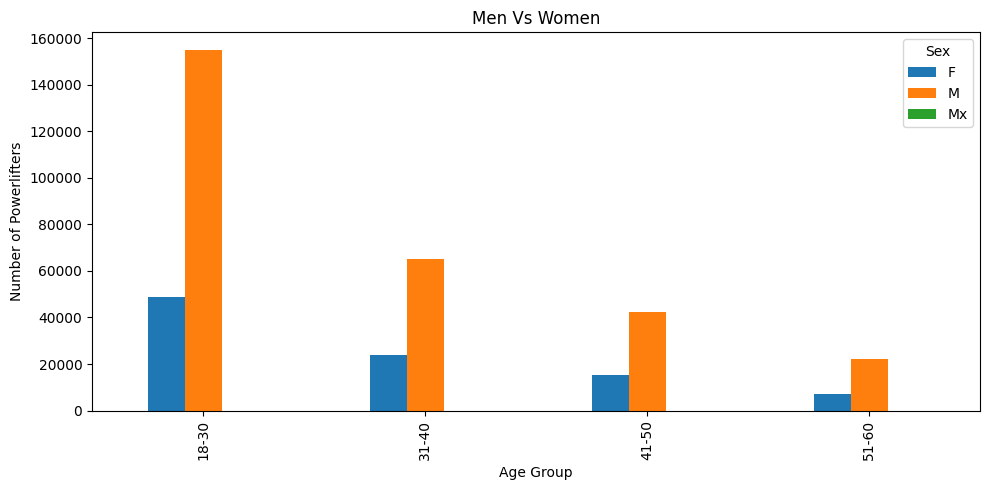

In [ ]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)
age_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men Vs Women')
plt.legend(title='Sex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#8. Pie chart for men with respect to age group (18-30 | 31-40 | 41-50 | 51-60)

<ipython-input-24-74216c9552aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_men = df_men.groupby('AgeGroup').size()


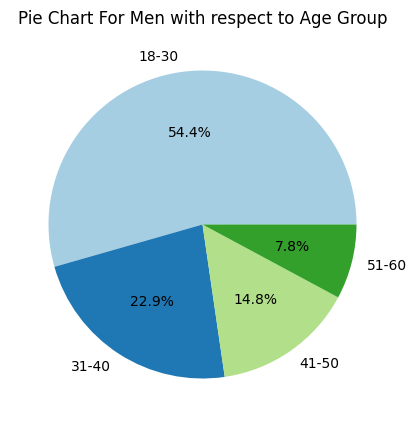

In [ ]:
df_men = df[df['Sex'] == 'M']
age_counts_men = df_men.groupby('AgeGroup').size()
plt.figure(figsize=(8, 5))
plt.pie(age_counts_men, labels=age_counts_men.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title('Pie Chart For Men with respect to Age Group')
plt.show()

#9. Pie chart for women with respect to age group (18-30 | 31-40 | 41-50 | 51-60)

<ipython-input-25-355f86972eed>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_women = df_men.groupby('AgeGroup').size()


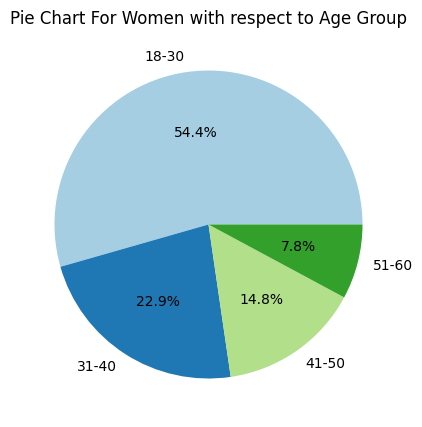

In [ ]:
df_men = df[df['Sex'] == 'F']
age_counts_women = df_men.groupby('AgeGroup').size()
plt.figure(figsize=(8, 5))
plt.pie(age_counts_men, labels=age_counts_men.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title('Pie Chart For Women with respect to Age Group')
plt.show()

#10. Bar-chart for men by age (use Age for binning purpose)

<ipython-input-23-9d290ba4b98e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_men = df_men.groupby('AgeGroup').size()


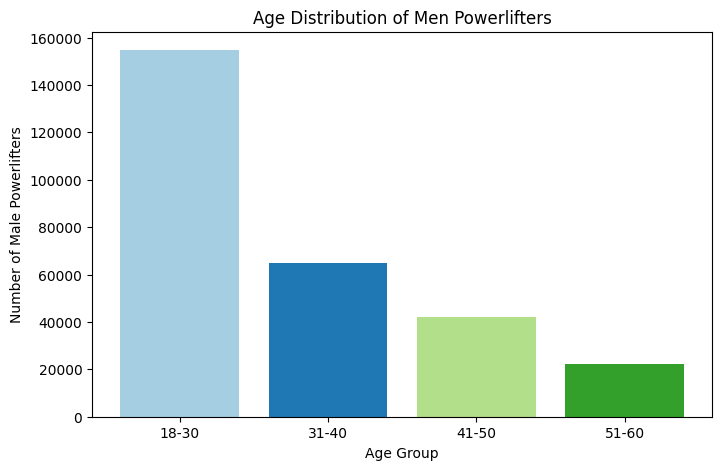

In [ ]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df_men = df[df['Sex'] == 'M']
age_counts_men = df_men.groupby('AgeGroup').size()
plt.figure(figsize=(8, 5))
plt.bar(age_counts_men.index, age_counts_men.values, color=plt.cm.Paired.colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Male Powerlifters')
plt.title('Age Distribution of Men Powerlifters')
plt.xticks(rotation=0)
plt.show()

#11. Bar-chart for women by age (use Age for binning purpose)

<ipython-input-22-558d29eedba4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_women = df_women.groupby('AgeGroup').size()


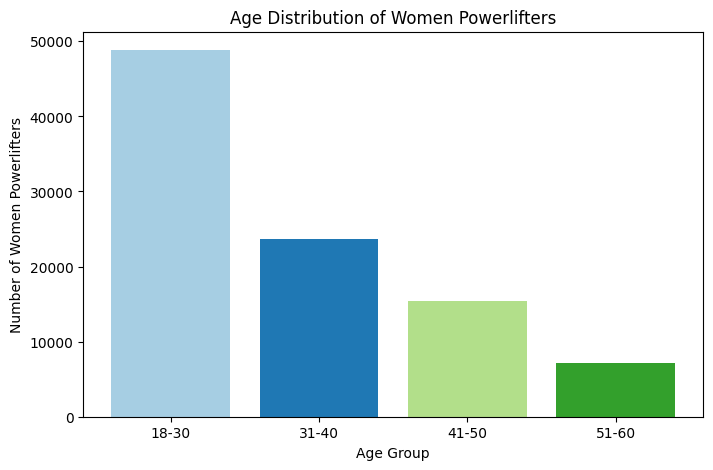

In [ ]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df_women = df[df['Sex'] == 'F']
age_counts_women = df_women.groupby('AgeGroup').size()
plt.figure(figsize=(8, 5))
plt.bar(age_counts_women.index, age_counts_women.values, color=plt.cm.Paired.colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Women Powerlifters')
plt.title('Age Distribution of Women Powerlifters')
plt.xticks(rotation=0)
plt.show()